<a href="https://colab.research.google.com/github/MargaritaOB/Telecom-X---Challenge-2---MArgarita-Brito/blob/main/telecomx_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

# URL of the JSON data
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Load the JSON data into a DataFrame directly from the URL
df = pd.read_json(url)

# Display the first few rows of the DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

**Conoce el conjunto de datos**

In [2]:
# Explore the DataFrame structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


**Comprobación de incoherencias en los datos**

In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


**Manejo de inconsistencias**

In [4]:
# Flatten the nested columns
df = pd.json_normalize(df.to_dict('records'))

# Display the first few rows of the flattened DataFrame
display(df.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Columna de cuentas diarias**

In [5]:
# Calculate daily charges and create the 'Cuentas_Diarias' column
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30.44

# Display the first few rows with the new column
display(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242


**Estandarización y transformación de datos**

In [6]:
# Identify columns with 'Yes' and 'No' values and convert them to 1 and 0
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].isin(['Yes', 'No']).all():
            df[col] = df[col].map({'Yes': 1, 'No': 0})
        elif df[col].isin(['Sí', 'No']).all():
             df[col] = df[col].map({'Sí': 1, 'No': 0})

# Display the data types to confirm the changes
display(df.dtypes)

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,int64
customer.Dependents,int64
customer.tenure,int64
phone.PhoneService,int64
phone.MultipleLines,object
internet.InternetService,object


#📊 Carga y análisis

**Análisis Descriptivo**

In [7]:
# Perform descriptive analysis
display(df.describe())

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.126153
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,0.989802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.599540
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.163765
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.309461
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.952530
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.901117


**Distribución de evasión**

/tmp/ipython-input-9-3429840642.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=colors)


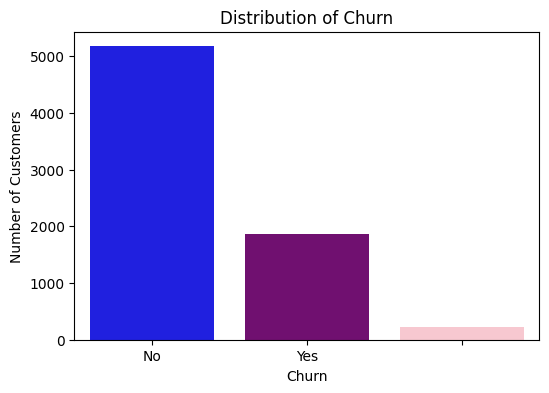

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of churn and non-churn customers
churn_counts = df['Churn'].value_counts()

# Define a custom color palette
colors = ['blue', 'purple', 'pink']

# Create a bar plot with custom colors
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=colors)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

**Recuento de evasión por variables categóricas**

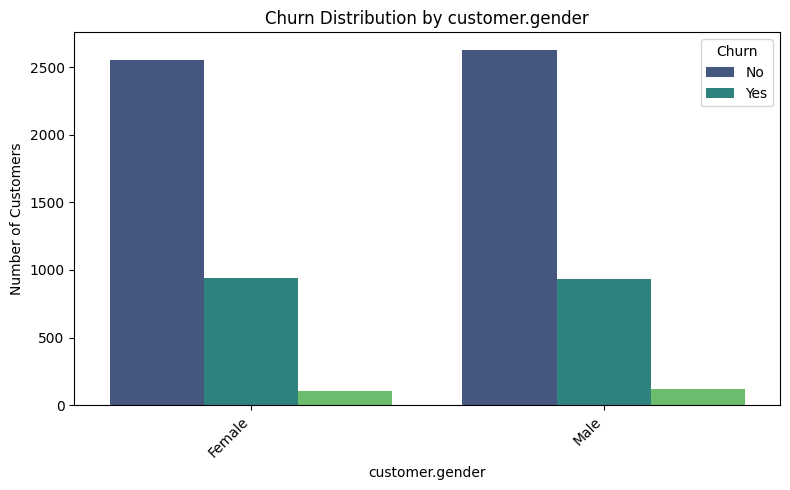

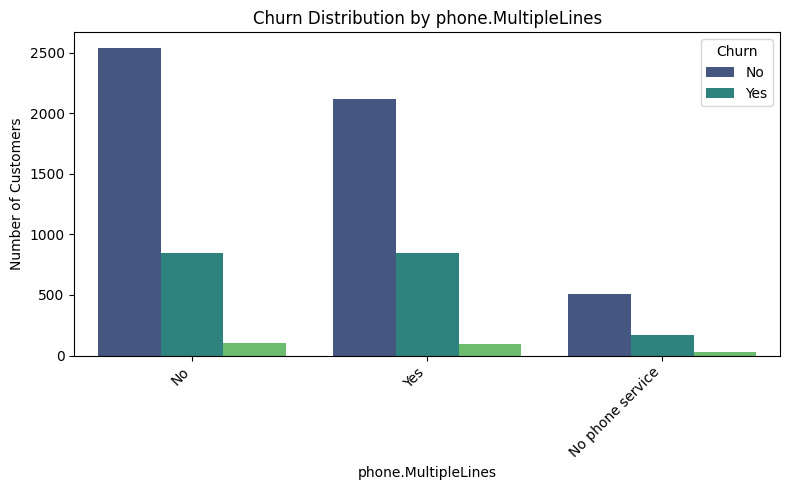

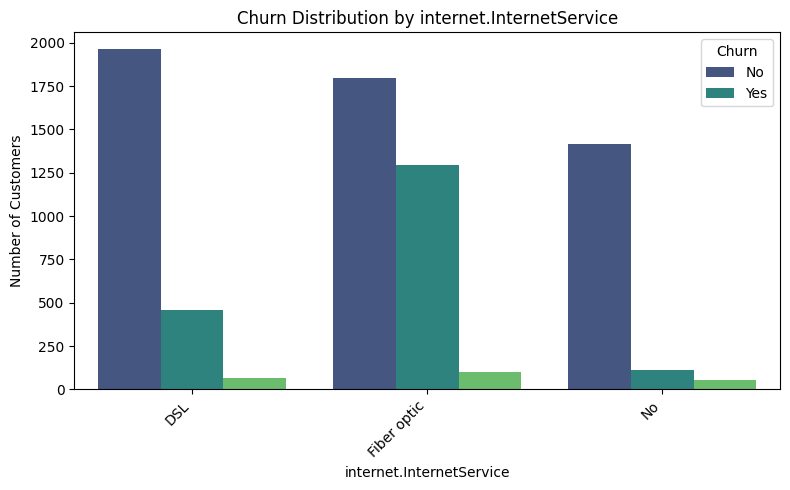

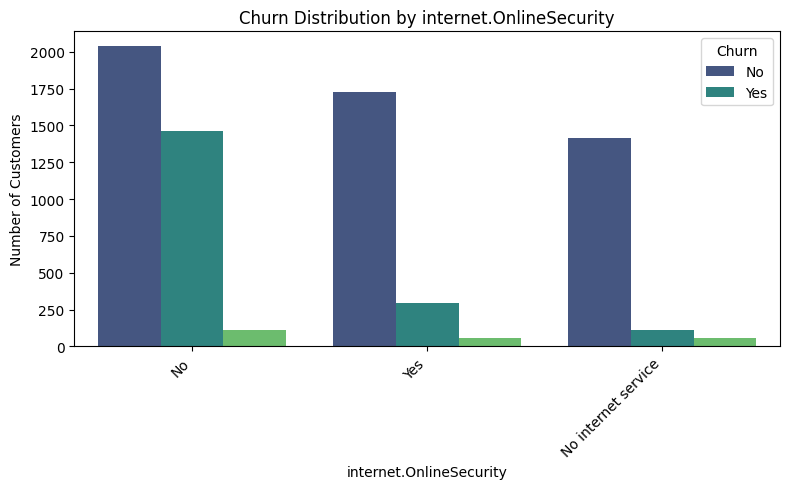

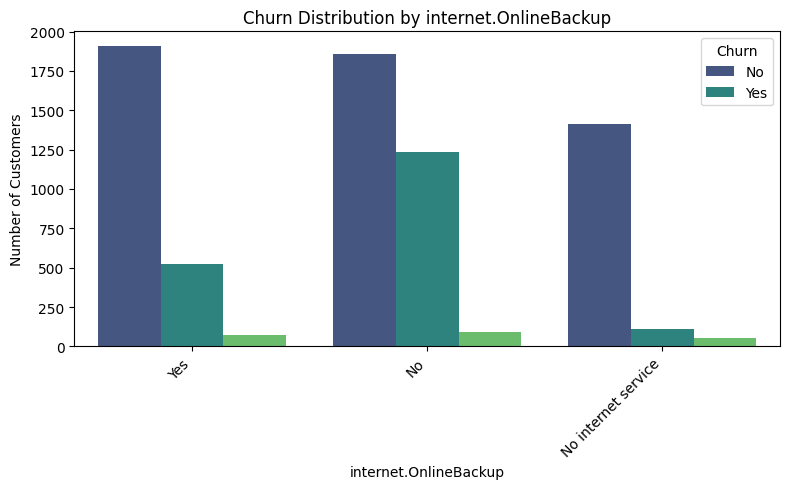

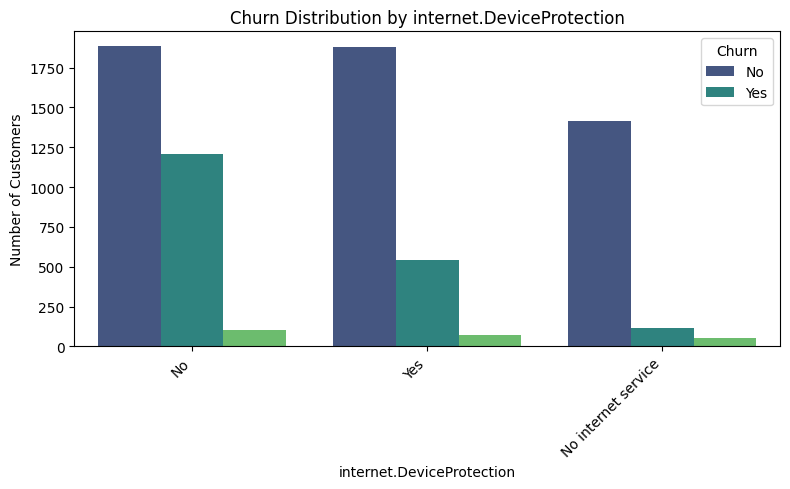

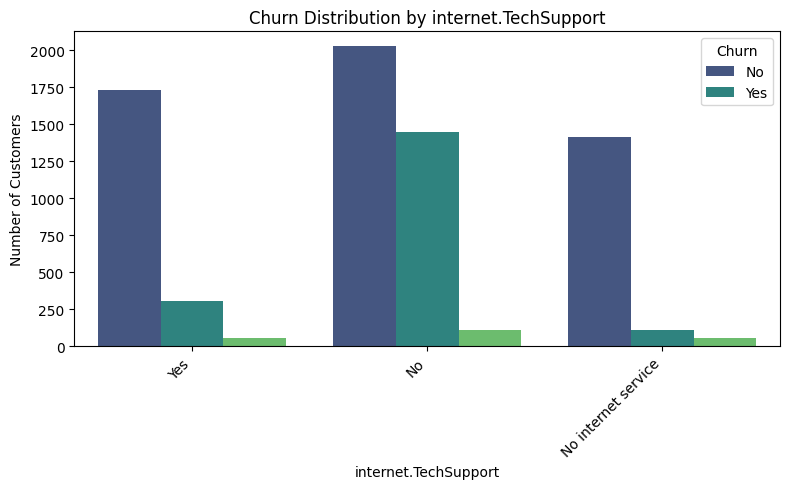

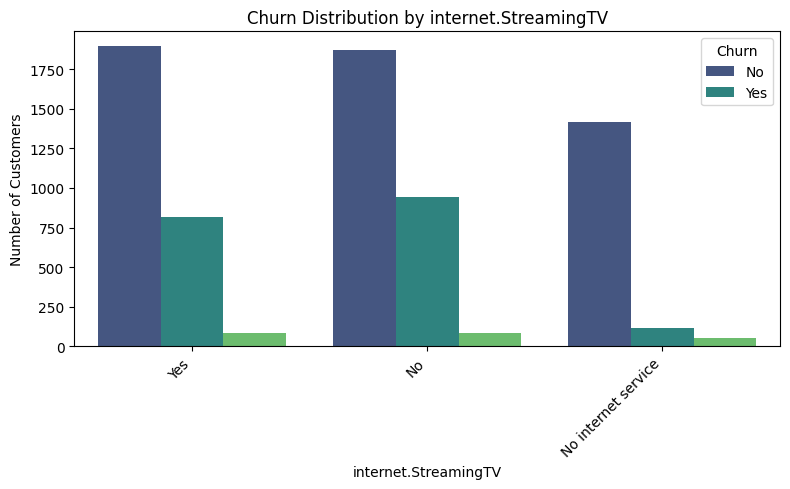

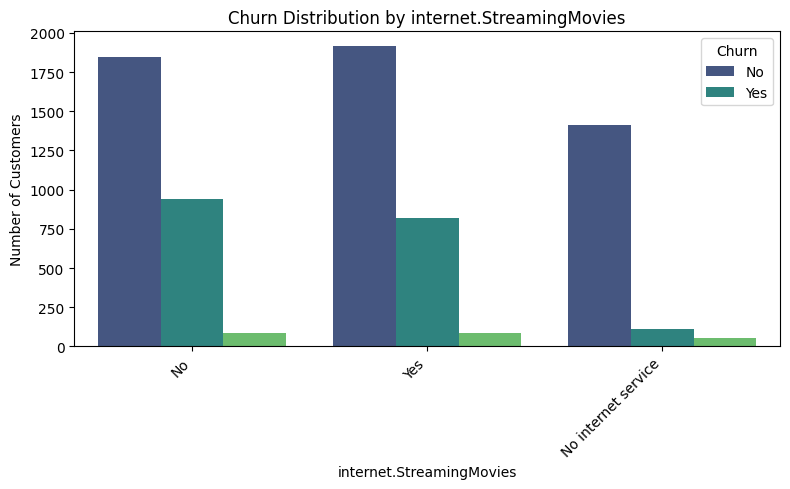

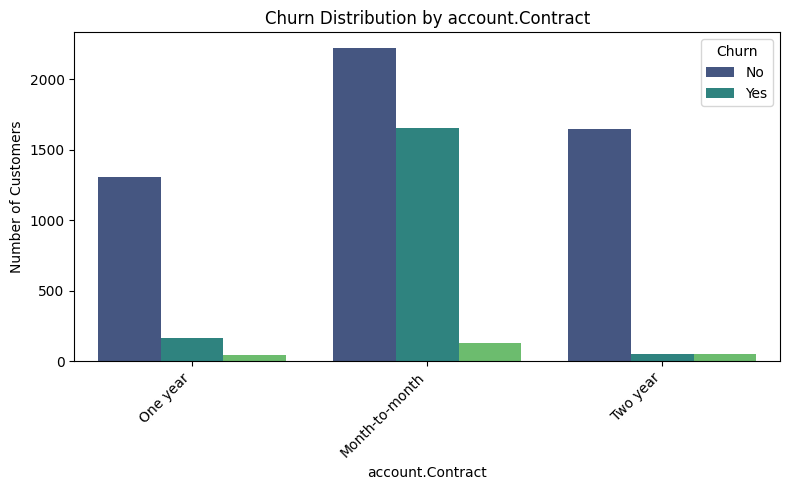

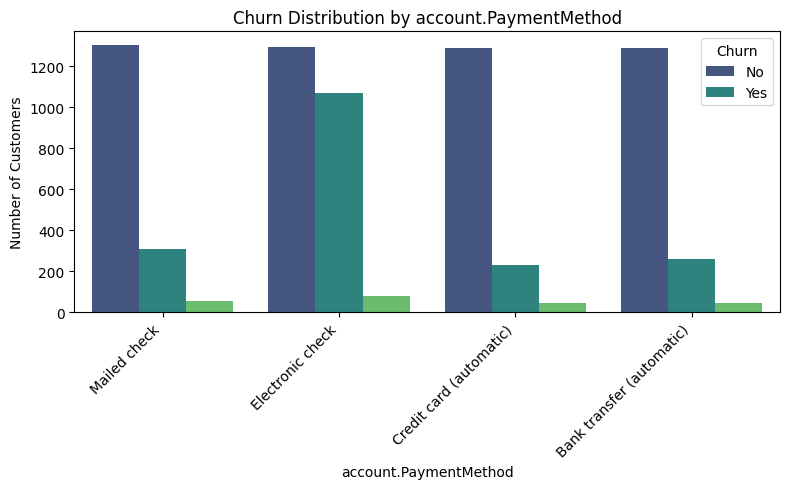

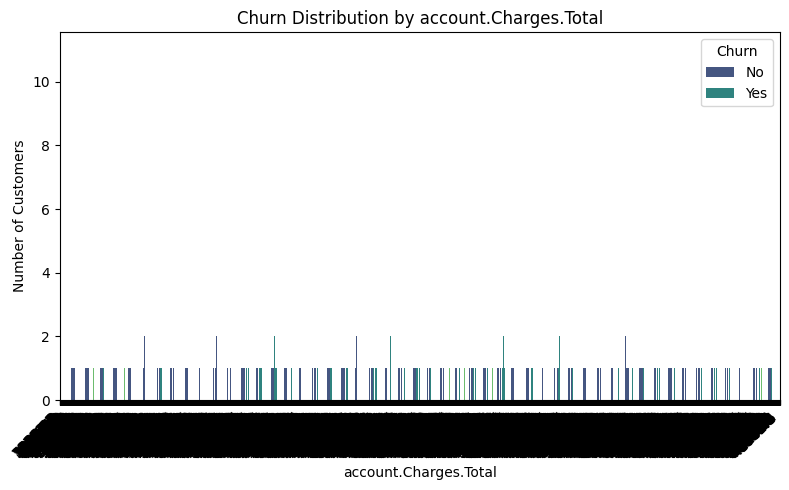

In [10]:
# Select categorical columns to analyze (excluding 'customerID' and 'Churn')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')


# Analyze churn distribution for each selected categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Conteo de evasión por variables numéricas**

/tmp/ipython-input-12-667372082.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn', y=col, palette='viridis', errorbar=None) # Use barplot and remove error bars for simplicity


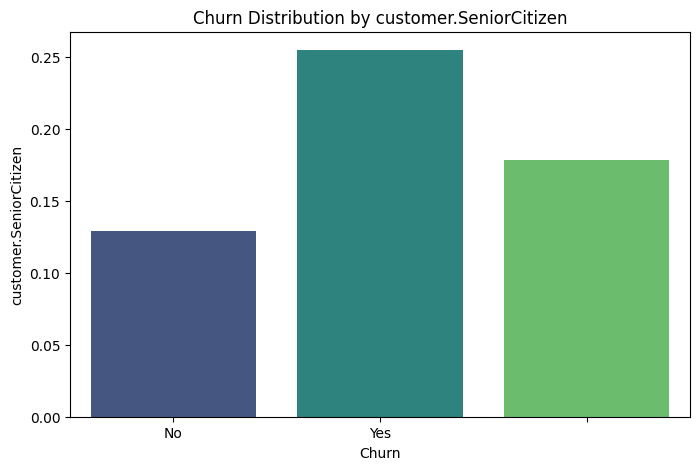

/tmp/ipython-input-12-667372082.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn', y=col, palette='viridis', errorbar=None) # Use barplot and remove error bars for simplicity


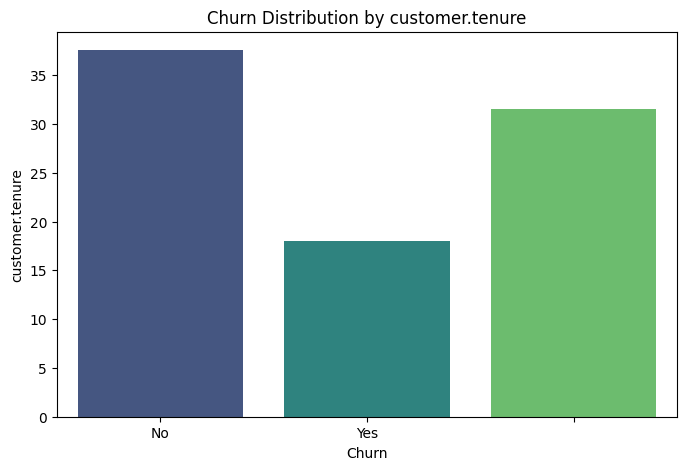

/tmp/ipython-input-12-667372082.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn', y=col, palette='viridis', errorbar=None) # Use barplot and remove error bars for simplicity


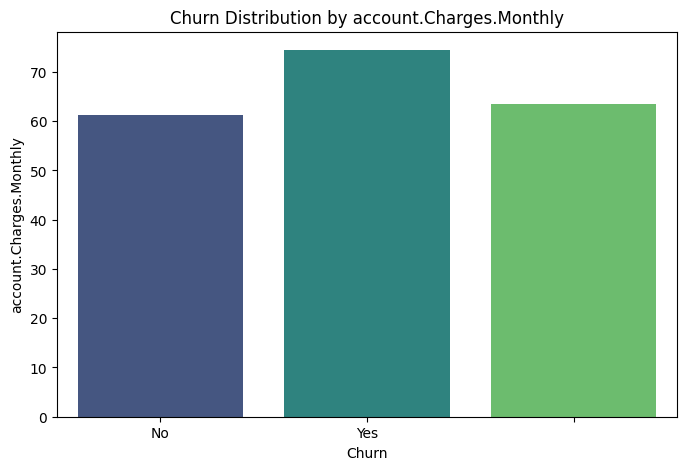

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns to analyze (excluding the calculated 'Cuentas_Diarias' for now as it's derived)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude binary columns that were originally 'Yes/No' but are now int64
binary_cols_to_exclude = [col for col in numerical_cols if df[col].isin([0, 1]).all() and col != 'customer.SeniorCitizen']
numerical_cols = [col for col in numerical_cols if col not in binary_cols_to_exclude and col != 'Cuentas_Diarias']

# Analyze churn distribution for each selected numerical column using bar plots
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='Churn', y=col, palette='viridis', errorbar=None) # Use barplot and remove error bars for simplicity
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [ ]:
# Read the content of the markdown file
with open("/content/TelecomX_diccionario.md", "r") as f:
    markdown_content = f.read()

# Display the content
print(markdown_content)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [ ]:
import pandas as pd

# Load the JSON data into a DataFrame
df = pd.read_json("/content/TelecomX_Data.json")

# Display the first few rows of the DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 📄 Final Report

## 🔹 Introduction
Explain the objective of the analysis and the customer churn problem.

## 🔹 Data Cleaning and Processing
Describe the steps taken to import, clean, and process the data. This includes loading the data, handling nested structures, checking for missing values, and transforming data types or values.

## 🔹 Exploratory Data Analysis
Present the analysis performed, including relevant charts and visualizations to identify patterns related to churn.

*   **Distribution of Churn:** Include the bar plot showing the proportion of churned and non-churned customers.
*   **Churn by Categorical Variables:** Include the count plots showing churn distribution across categorical features.
*   **Churn by Numerical Variables:** Include the bar plots (or box plots) showing the distribution of numerical variables for churned and non-churned customers.

## 🔹 Conclusions and Insights
Summarize the main findings from the analysis and how these insights can help reduce churn.


# Reporte Final en español.

🔹 Introducción
Explica el objetivo del análisis y el problema de la pérdida de clientes (churn).

🔹 Limpieza y Procesamiento de Datos
Describe los pasos realizados para importar, limpiar y procesar los datos. Esto incluye la carga de datos, el manejo de estructuras anidadas, la verificación de valores faltantes y la transformación de tipos o valores de datos.

🔹 Análisis Exploratorio de Datos
Presenta el análisis realizado, incluyendo gráficos y visualizaciones relevantes para identificar patrones relacionados con la pérdida de clientes (churn).

Distribución de la pérdida de clientes (Churn): Incluye el gráfico de barras que muestra la proporción de clientes que se fueron (churned) y los que no (non-churned).

Pérdida de clientes (Churn) por Variables Categóricas: Incluye los gráficos de conteo que muestran la distribución de la pérdida de clientes (churn) a través de características categóricas.

Pérdida de clientes (Churn) por Variables Numéricas: Incluye los gráficos de barras (o diagramas de caja) que muestran la distribución de las variables numéricas para los clientes que se fueron (churned) y los que no (non-churned).

🔹 Conclusiones y Perspectivas
Resume los principales hallazgos del análisis y cómo estas perspectivas pueden ayudar a reducir la pérdida de clientes (churn).